In [1]:
import pandas as pd
import sqlite3

## Make a connection to the database

In [2]:
con = sqlite3.connect("../data/Checking_Logs.sqlite")

## Run a query that gets the datetime from the pageviews table, selecting only the users and not the admins

In [3]:
df = pd.read_sql('SELECT datetime FROM pageviews WHERE uid LIKE "user_%"', con, parse_dates=['datetime'])
df

,datetime
0,2020-04-17 22:46:26.785035
1,2020-04-18 10:53:52.623447
2,2020-04-18 10:56:55.833899
3,2020-04-18 10:57:37.331258
4,2020-04-18 12:05:48.200144
...,...
982,2020-05-21 18:45:20.441142
983,2020-05-21 23:03:06.457819
984,2020-05-21 23:23:49.995349
985,2020-05-22 11:30:18.368990


## Using Pandas, create a new dataframe where the visits are counted and grouped by date

In [4]:
df = df.groupby(by=[df['datetime'].dt.date]).count()
df.rename(columns={'datetime': 'visits'}, inplace= True)
df.head()

,visits
datetime,
2020-04-17,1
2020-04-18,23
2020-04-19,15
2020-04-21,3
2020-04-22,1


## Using Pandas method .plot(), create a graph
- the size of the font should be 8

* the size of the figure is (15,8)

* the graph must have the title Views per day

* notice the rotation of xticks on the graph below

<Axes: title={'center': 'Views per day'}, xlabel='datetime'>

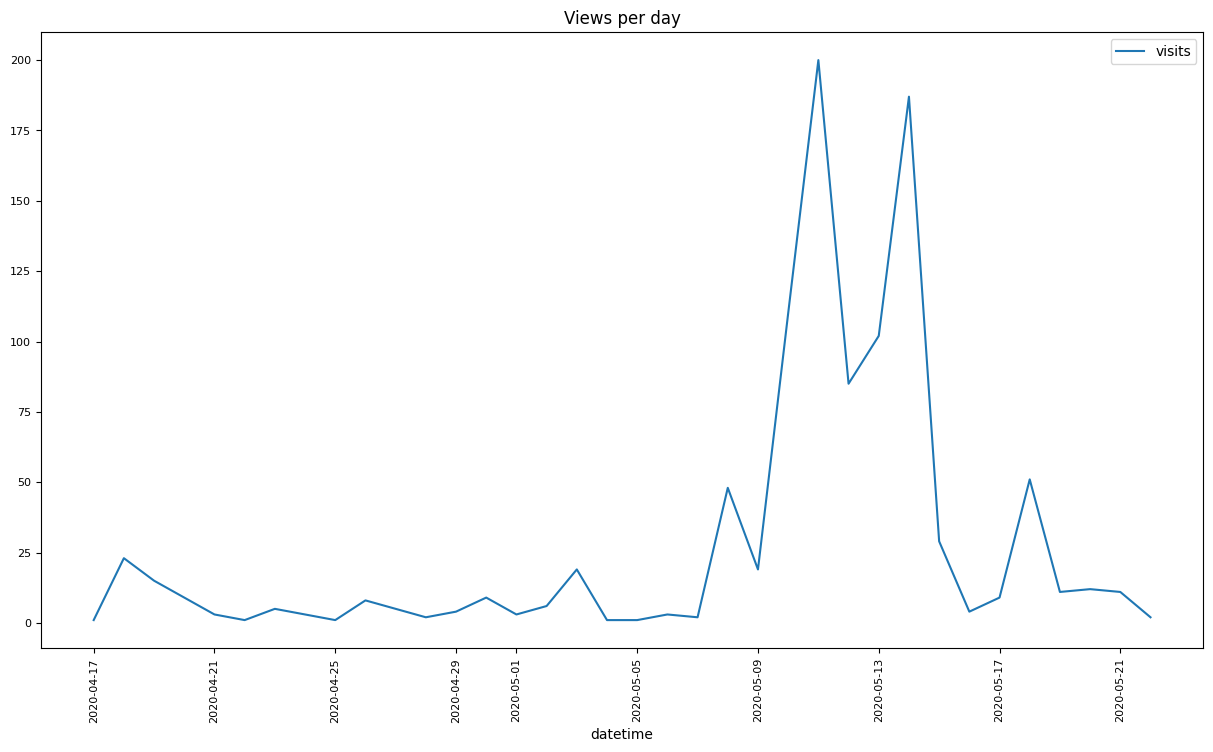

In [5]:
df.plot(figsize=(15, 8), fontsize=8, title="Views per day", rot=90)

## Close the connection to the database

In [6]:
con.close()